In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble, Aer, execute

qreg = QuantumRegister(5)
creg = ClassicalRegister(5)
qc = QuantumCircuit(qreg, creg)
qc.initialize([(1/(2**0.5)),(1/(4**0.5)),(1/(8**0.5)),(1/(16**0.5)),(1/(32**0.5)),(1/(64**0.5)),(1/(128**0.5)),(1/(256**0.5)),
              (1/(512**0.5)),(1/(1024**0.5)),(1/(2048**0.5)),(1/(4096**0.5)),(1/(8192**0.5)),(1/(16384**0.5)),(1/(32768**0.5)),(1/(65536**0.5)),
              (1/(131072**0.5)),(1/(262144**0.5)),(1/(524288**0.5)),(1/(1048576**0.5)),(1/(2097152**0.5)),(1/(4194304**0.5)),(1/(8368608**0.5)),(1/(16777216**0.5)),
              (1/(33554432**0.5)),(1/(67108864**0.5)),(1/(134217728**0.5)),(1/(268435456**0.5)),(1/(536870912**0.5)),(1/(1073741824**0.5)),(1/(2147483648**0.5)),(1/(4294967296**0.5))], qc.qubits)

qc.measure(qreg, creg)

#get counts
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots = 21000000)
counts = job.result().get_counts()

sorted_counts = sorted(counts.items(), key=lambda x:x[1], reverse=True)
converted_counts = dict(sorted_counts)

print(converted_counts)
print() 
print('The Bitcoin supply is 21000000')


C:\Users\Student5\anaconda3\anaconda2\envs\QWorld_Summer_School\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


{'00000': 10502540, '00001': 5248759, '00010': 2623646, '00011': 1313062, '00100': 656617, '00101': 327007, '00110': 163762, '00111': 82243, '01000': 41020, '01001': 20514, '01010': 10411, '01011': 5226, '01100': 2576, '01101': 1300, '01110': 646, '01111': 342, '10000': 143, '10001': 98, '10010': 44, '10011': 19, '10100': 17, '10101': 4, '10110': 3, '10111': 1}

The Bitcoin supply is 21000000


In [2]:
print('The Bitcoin supply now is approximately', counts.get('00000') + counts.get('00001') + counts.get('00010') + 1100000)

The Bitcoin supply now is approximately 19474945


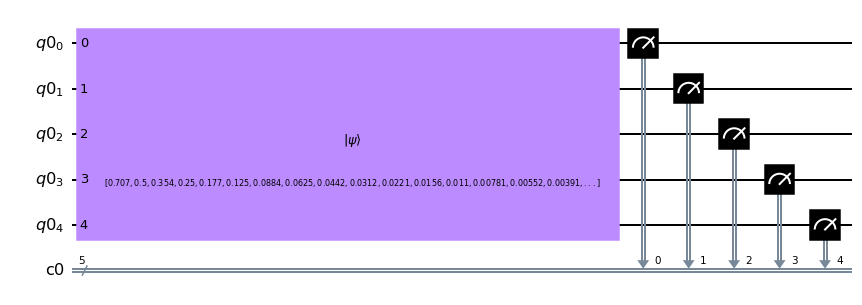

In [3]:
qc.draw('mpl')

In [4]:
# figure out what gates were used using QASM
str = qc.qasm()
print(str)

OPENQASM 2.0;
include "qelib1.inc";
gate multiplex1_reverse_reverse_reverse_reverse_dg q0 { ry(7.0314616e-05) q0; }
gate multiplex2_reverse_reverse_reverse_dg q0,q1 { multiplex1_reverse_reverse_reverse_dg q0; cx q1,q0; multiplex1_reverse_reverse_reverse_reverse_dg q0; }
gate multiplex3_reverse_reverse_dg q0,q1,q2 { multiplex2_reverse_reverse_reverse_dg q0,q1; cx q2,q0; multiplex2_reverse_reverse_dg q0,q1; }
gate multiplex1_reverse_reverse_reverse_reverse_reverse_dg q0 { ry(7.0314616e-05) q0; }
gate multiplex2_reverse_reverse_reverse_reverse_dg q0,q1 { multiplex1_reverse_reverse_reverse_reverse_reverse_dg q0; cx q1,q0; multiplex1_reverse_reverse_reverse_reverse_dg q0; }
gate multiplex3_reverse_reverse_reverse_dg q0,q1,q2 { multiplex2_reverse_reverse_reverse_dg q0,q1; cx q2,q0; multiplex2_reverse_reverse_reverse_reverse_dg q0,q1; }
gate multiplex4_reverse_reverse_dg q0,q1,q2,q3 { multiplex3_reverse_reverse_reverse_dg q0,q1,q2; cx q3,q0; multiplex3_reverse_reverse_dg q0,q1,q2; }
gate mult

In [ ]:
#Coming Soon! ---> Use Quantum Circuit Optimization or Other techniques to simplify the gates used in this simple geometric series